# Salary Predictions Based on Job Descriptions

### Part 1 - DEFINE

### ---- 1 Define the problem ---- 
    examine a set of job postings with salaries and then predict salaries for a new set of job postings.
    
### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [4]:
train_feature_df = load_dataset('data/train_features.csv')
train_target_df = load_dataset('data/train_salaries.csv')
test_feature_df = load_dataset('data/test_features.csv')
### Merge the train dataset
train_df = consolidate_data(train_feature_df, train_target_df, key = 'jobId')


### ---- 3 Clean the data ---- Check for duplicates

In [5]:
check_for_duplicates(train_df, test_feature_df)

 Duplicates in train_df = 0
 Duplicates in test_feature_df = 0


## ---- 4 Explore the data (EDA) ----

### Examine the data

In [6]:
train_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Summarize numerical and categorical variables separety

In [7]:
train_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [8]:
train_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684791020,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### Visualize target variable

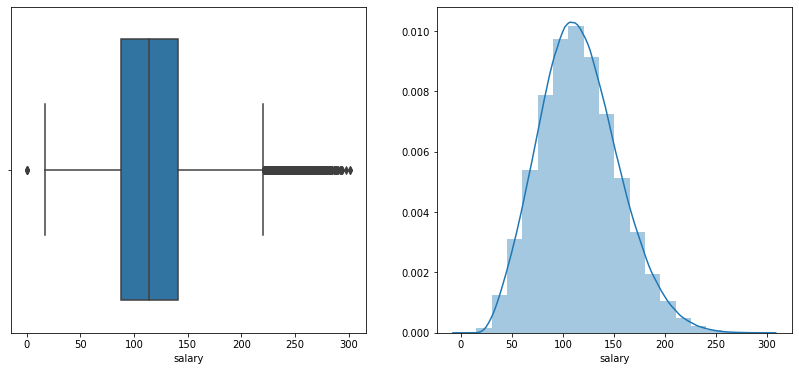

In [13]:
visualize_column(train_df['salary'], bins=20)

We observe that the average salary is roughly 105K and it looks a like normal distribution. The boxplot indicates that we have potential outliers on the left and also on the right. So we are going to investigate below.

### Use IQR rule to identify potential outliers

In [16]:
statistical_reports(train_df['salary'])

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


### Examine potential outliers

In [17]:
#check potential outliers below lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


We can conclude that these are probably missing data because employee serving as CTO, Manager and Vice-president with high school, doctor and masters degree respectively do not work for free after few years of experience. Therefore we will remove these data

In [18]:
#check potential outliers below upper bound
train_df.loc[train_df.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

We know from our intuition that starting from senior roles and above are very highly ranked and pays a tremendous amount of salary. Therefore, we look at junior roles and determine the upper outliers need to be deal in a special way

In [19]:
# Check most suspicious potential outliers aboce upper bound
train_df[(train_df.salary > 220.5) & (train_df.jobType =='JUNIOR')].head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223


All high salary potential outliers seem to be legimate data. Most roles are C-level executive roles and the junior positions are in industries that are well known for high salaries (oil, finance). We determine these entries to be legimate and will not remove them

In [20]:
# Remove data with zero salary and remove any duplicates on jobID
train_df = clean_data(train_df, 'jobId', 'salary')

### Plotting Feature

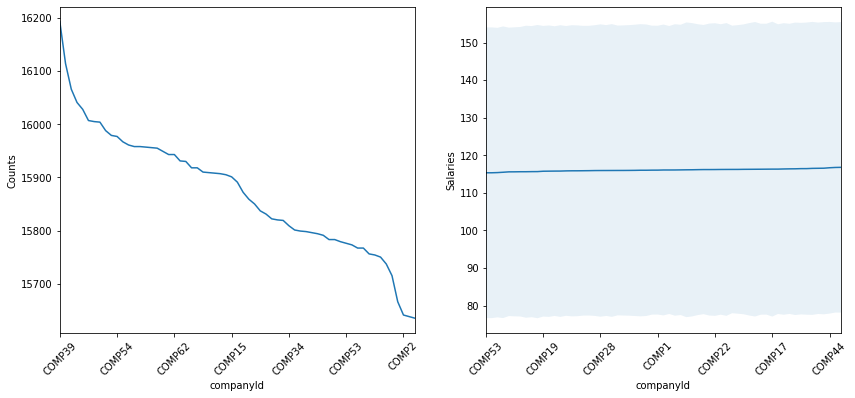

In [21]:
plot_feature(train_df, 'companyId')

**The salary is weakly associated with companies**

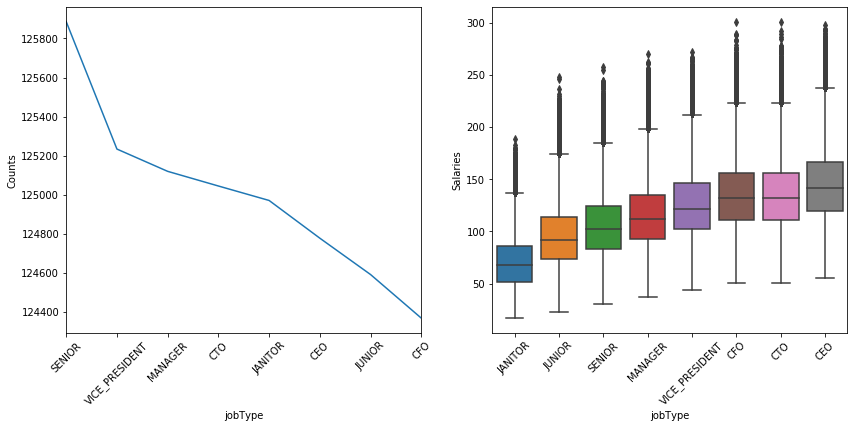

In [22]:
plot_feature(train_df, 'jobType')

**There is a clear positive correlation between job type and salary**

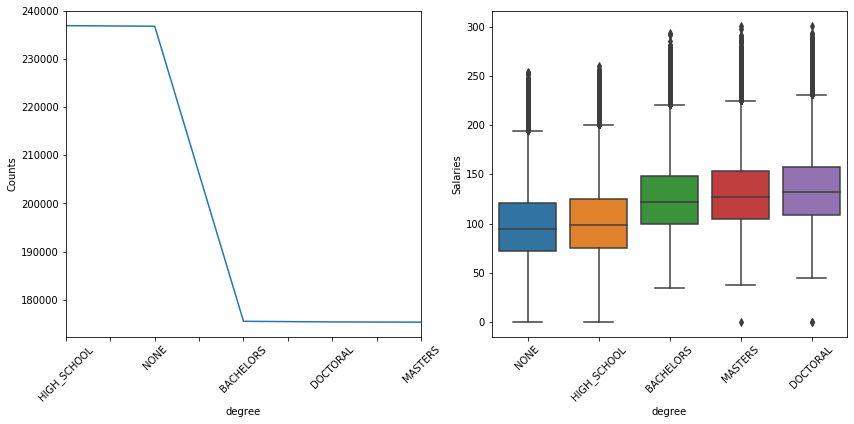

In [14]:
plot_feature(train_df, "degree")

**More advanced degrees tend to correspond to higher salaries**

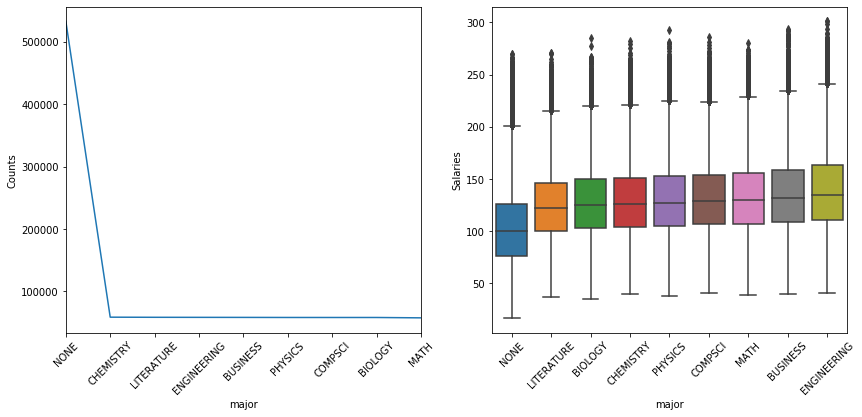

In [24]:
plot_feature(train_df, "major")

**People with majors of engineering, business and math generally have higher salaries**

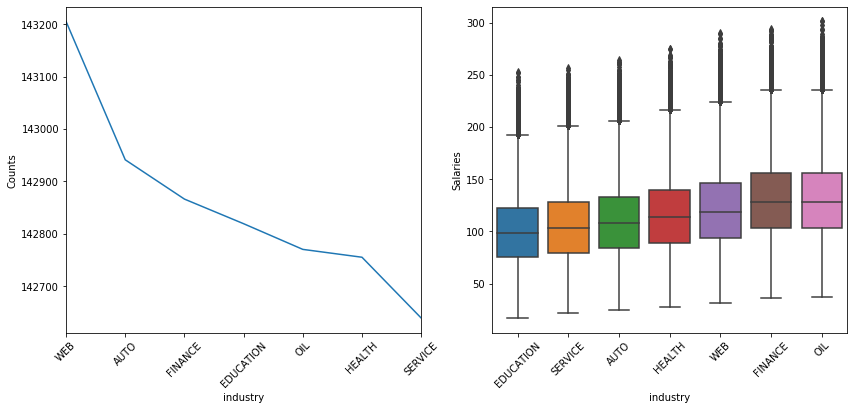

In [25]:
plot_feature(train_df, 'industry')

**As for industries, oil, finance and web industries generally pay better**

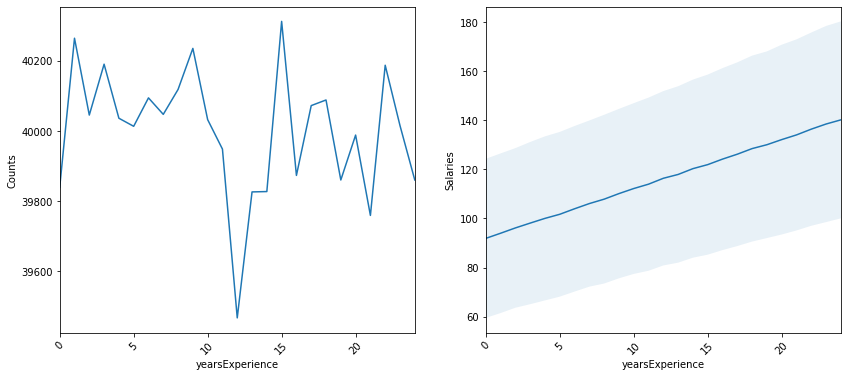

In [26]:
plot_feature(train_df, 'yearsExperience')

**In general there is a clear correlation between salary and years of experience**

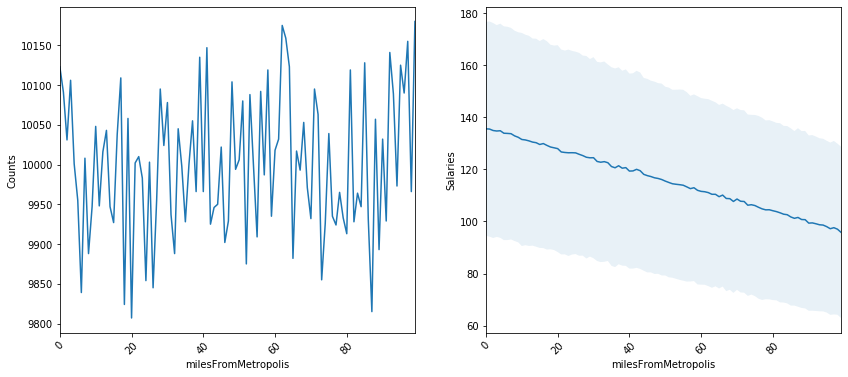

In [27]:
plot_feature(train_df, 'milesFromMetropolis')

**In general, salaries decrease with distance to metropolies**

### Corrolation between each features

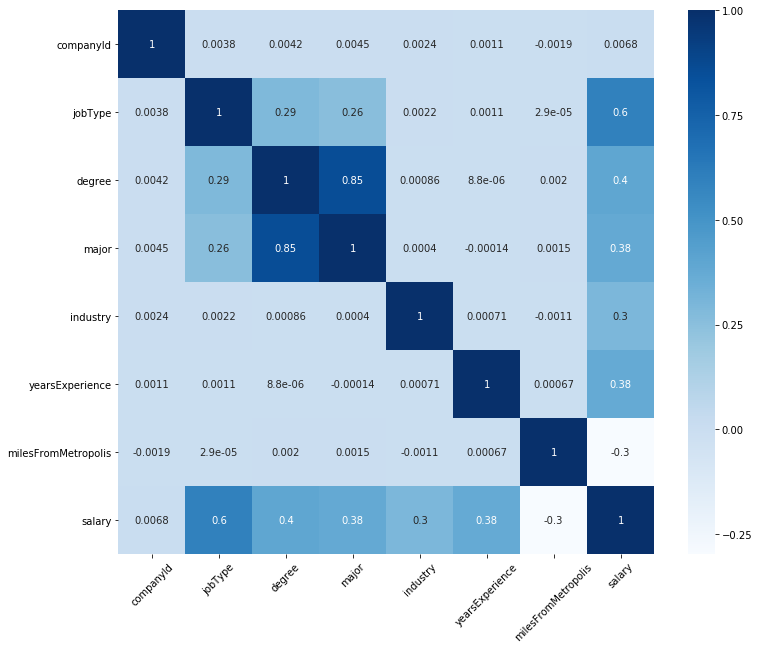

In [28]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df, col)
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
# Change all the feature column in numeric form
train_df[features]=train_df[features].astype(int)
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

### Helper Function

In [10]:
# load the data
def load_dataset(file):
    """
    Read a comma-separated values (csv) file into DataFrame.
    
    Parameters
    ----------
    file: the directory of the dataset
    """
    return pd.read_csv(file)

#Merge Dataset
def consolidate_data(df1, df2, key=None, left_index=False, right_index=False):
    """
    Performs inner join to return only records that are present in both dataframe
    
    Parameters
    ----------
    
    df1: DataFrame1
    df2: DataFrame2
    key: Column or index level names to join on. These must be found in both DataFrames.
    
    left_index: bool, default False
                Use the index from the left DataFrame as the join key(s). If it is a
                MultiIndex, the number of keys in the other DataFrame (either the index
                or a number of columns) must match the number of levels.
    
    right_index: bool, default False
                 Use the index from the right DataFrame as the join key. Same caveats as left_index.
    
    """
    return pd.merge(left=df1, right=df2, how='inner', on=key, left_index=left_index, right_index=right_index)
    

# Check for duplicates
def check_for_duplicates(*dataframes):
    """
    Return the number of duplicates in a dataframe
    
    Parameters
    ----------
    dataframes: Name of the dataframes
    
    """
    for dataframe in dataframes:
        name =[x for x in globals() if globals()[x] is dataframe][0]
        print(f' Duplicates in {name} = {dataframe.duplicated().sum()}')
        

# Visualize a single column of a DataFrame
def visualize_column(data, bins=10):
    """
    Returns a boxplot and displot of a single columns from a dataset
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays Dataset for plotting. 
    
    bins : argument for matplotlib hist(), or Default is 10, optional
           Specification of hist bins, or None to use Freedman-Diaconis rule.
    
    """
    plt.figure(figsize = (14,6))
    plt.subplot(1,2,1)
    sns.boxplot(data)
    plt.subplot(1,2,2)
    sns.distplot(data, bins)
    plt.show()

# Statistical Reports of a given data
def statistical_reports(data):
    """
    Generate descriptive statistics that summarize the central tendency,
    dispersion and shape of a dataset's distribution, excluding ``NaN`` values
    
    Analyzes both numeric and object series, as well as ``DataFrame`` 
    column sets of mixed data types. The output will vary depending on what is provided
    
    Also provides the potential outliers (lower bounds and upper bounds).
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays Dataset
    
    """
    stat = data.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5*IQR
    lower = stat['25%'] - 1.5*IQR
    print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

# Clean Data
def clean_data(raw_df, duplicate_column_check, target_column, rearrange = False):
    """
    Remove rows that contain value of target_column (salary in this case) < 0 
    and check duplicate based on a single column
    
    Parameters
    ----------
    
    raw_df: Dataset that are targeted to be cleaned
    duplicate_column_check: name the column on the raw_df that may have duplicates
    target_column: predicted column
    rearrange: Default False. 
               Shuffle and reindex data -- shuffling improves cross-validation
    """
    clean_df = raw_df.drop_duplicates(subset= duplicate_column_check)
    clean_df = clean_df[clean_df[target_column]>0]
    if rearrange == False:
        return clean_df
    else:
        return shuffle(clean_df).reset_index()
    
# Plot Feature
def plot_feature(df, col):
    """
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    
    Parameters
    ----------
    df : DataFrame, array, or list of arrays Dataset
    col: columns of a dataframe
    
    """
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    
    plt.subplot(1, 2, 2)
    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')

# encode label
def encode_label(df, col):
    '''
    encode the categories using average salary for each category to replace label
    
    Parameters
    ----------
    df: Name of the dataframes
    col: column in the dataframe
    '''
    
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col]==cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)